# Netflix Project

### The Data

We will be using 3 sets of data from kaggle, that data is:
<ul>
<li><a href="https://www.kaggle.com/shivamb/netflix-shows" >Netflix Movies and TV Shows</a></li>
<li><a href="https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset" >IMDb movies extensive dataset</a></li>
<li><a href="https://www.kaggle.com/zygmunt/goodbooks-10k" >goodbooks-10k</a></li>
</ul>

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
netflix_df = pd.read_csv("Netflix Movies and TV Show/netflix_titles.csv")
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Using .info() we can see how many columns this data set has. For this data set, there are 12 columns for exploratory data analysis.

In [4]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### Using .isnull, we can see if there is missing value in this data set.

## Data Cleansing and Exploratory Data Analysis

In [5]:
netflix_shows=netflix_df[netflix_df['type']=='TV Show']

In [6]:
netflix_movies=netflix_df[netflix_df['type']=='Movie']

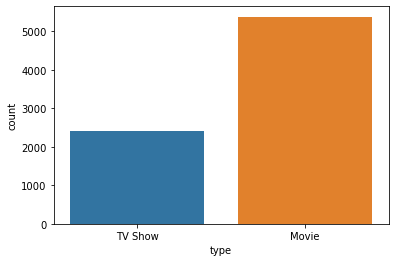

In [7]:
sns.countplot(x='type', data=netflix_df)

#### There are more movies on Netflix than TV Shows.

### Date of Release
#### TV Shows

In [8]:
netflix_shows_date = netflix_shows[['date_added']].dropna()
netflix_shows_date['year'] = netflix_shows_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_shows_date['month'] = netflix_shows_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

In [9]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

In [10]:
date_shows_df = netflix_shows_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month].T

In [11]:
date_shows_df

year       2008  2013  2014  2015  2016  2017  2018  2019  2020  2021
month                                                                
December    0.0   0.0   1.0   7.0  44.0  39.0  64.0  50.0  74.0   0.0
November    0.0   0.0   3.0   2.0  18.0  31.0  41.0  77.0  55.0   0.0
October     0.0   2.0   0.0   5.0  18.0  32.0  46.0  73.0  56.0   0.0
September   0.0   1.0   0.0   1.0  19.0  33.0  44.0  44.0  62.0   0.0
August      0.0   1.0   0.0   0.0  17.0  38.0  34.0  53.0  61.0   0.0
July        0.0   0.0   0.0   3.0  10.0  34.0  30.0  67.0  53.0   0.0
June        0.0   0.0   0.0   3.0   8.0  30.0  28.0  48.0  48.0   0.0
May         0.0   0.0   0.0   2.0   4.0  25.0  28.0  49.0  64.0   0.0
April       0.0   0.0   1.0   4.0   8.0  29.0  31.0  50.0  58.0   0.0
March       0.0   1.0   0.0   2.0   3.0  38.0  38.0  60.0  56.0   0.0
February    1.0   0.0   1.0   1.0   7.0  18.0  24.0  46.0  46.0   0.0
January     0.0   0.0   0.0   0.0  29.0  14.0  22.0  39.0  64.0  29.0

Text(0.2, 1.02, 'Netflix TV Shows Contents Update')

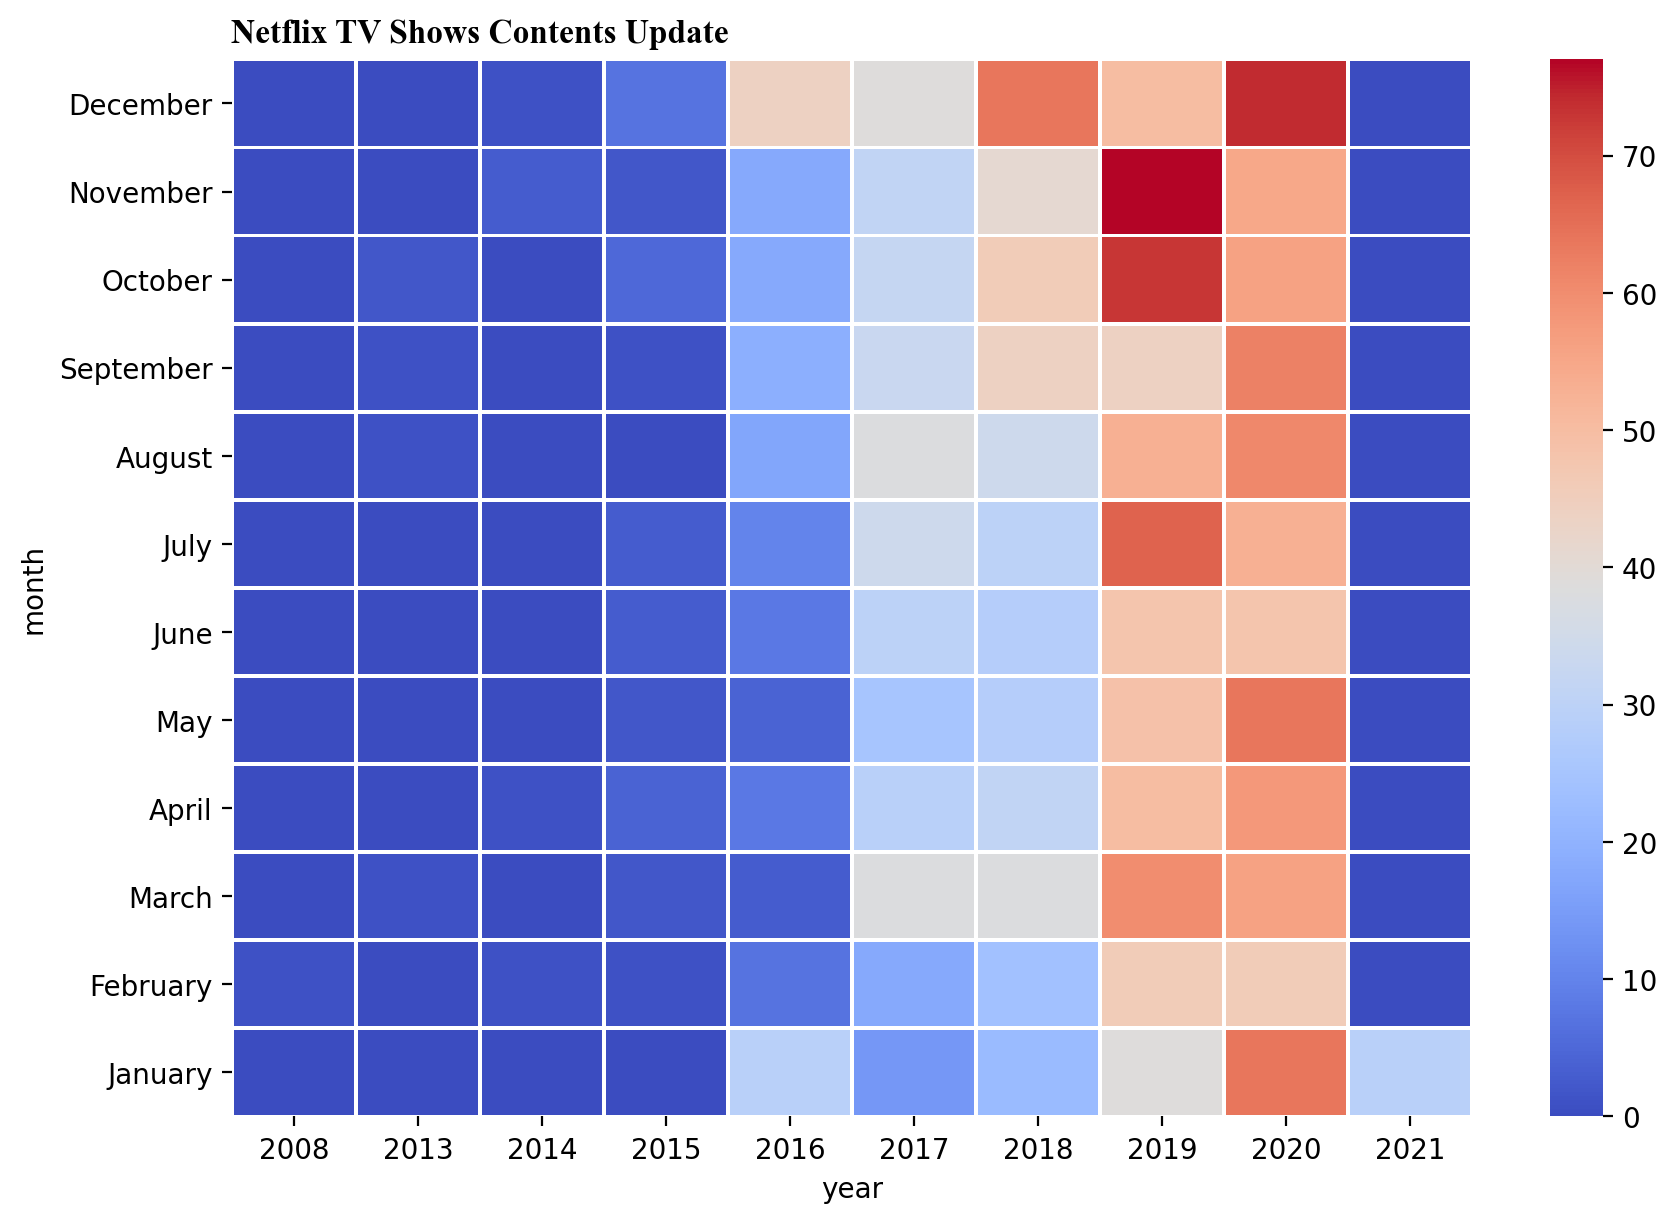

In [12]:
plt.figure(figsize=(10, 7), dpi=200)
sns.heatmap(date_shows_df, cmap='coolwarm',linewidths=1,linecolor='white')
plt.title('Netflix TV Shows Contents Update', fontsize=12, fontfamily='times new roman', fontweight='bold', position=(0.20, 1.0+0.02))

### Movies

In [13]:
netflix_movies_date = netflix_movies[['date_added']].dropna()
netflix_movies_date['year'] = netflix_movies_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_movies_date['month'] = netflix_movies_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

In [14]:
date_movies_df = netflix_movies_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month].T

In [15]:
date_movies_df

year       2008  2009  2010  2011  2012  2013  2014  2015  2016   2017   2018  \
month                                                                           
December    0.0   0.0   0.0   0.0   1.0   2.0   5.0  16.0  52.0   79.0  126.0   
November    0.0   1.0   1.0   0.0   1.0   2.0   2.0   2.0  28.0   57.0  119.0   
October     0.0   0.0   0.0  11.0   0.0   1.0   4.0  10.0  34.0   99.0  146.0   
September   0.0   0.0   0.0   1.0   0.0   1.0   1.0   6.0  29.0   86.0   83.0   
August      0.0   0.0   0.0   0.0   0.0   0.0   1.0   2.0  24.0   77.0  135.0   
July        0.0   0.0   0.0   0.0   0.0   0.0   1.0   5.0  19.0   46.0  127.0   
June        0.0   0.0   0.0   0.0   0.0   0.0   1.0   4.0  11.0   65.0   50.0   
May         0.0   1.0   0.0   1.0   0.0   0.0   0.0   5.0   9.0   63.0   73.0   
April       0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0  14.0   66.0   87.0   
March       0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0  14.0  102.0  137.0   
February    0.0   0.0   0.0   0.0   1.0   0.0   1.0   3.0   9.0   66.0   64.0   
January     1.0   0.0   0.0   0.0   0.0   0.0   2.0   1.0  15.0   58.0  108.0   

year        2019   2020  2021  
month                          
December   172.0  101.0   0.0  
November   195.0  103.0   0.0  
October    131.0  117.0   0.0  
September   92.0  116.0   0.0  
August      92.0   83.0   0.0  
July       102.0  103.0   0.0  
June       127.0  119.0   0.0  
May        110.0  109.0   0.0  
April      121.0  130.0   0.0  
March      119.0   96.0   0.0  
February   113.0   71.0   0.0  
January    123.0  164.0  88.0

Text(0.2, 1.02, 'Netflix Movies Contents Update')

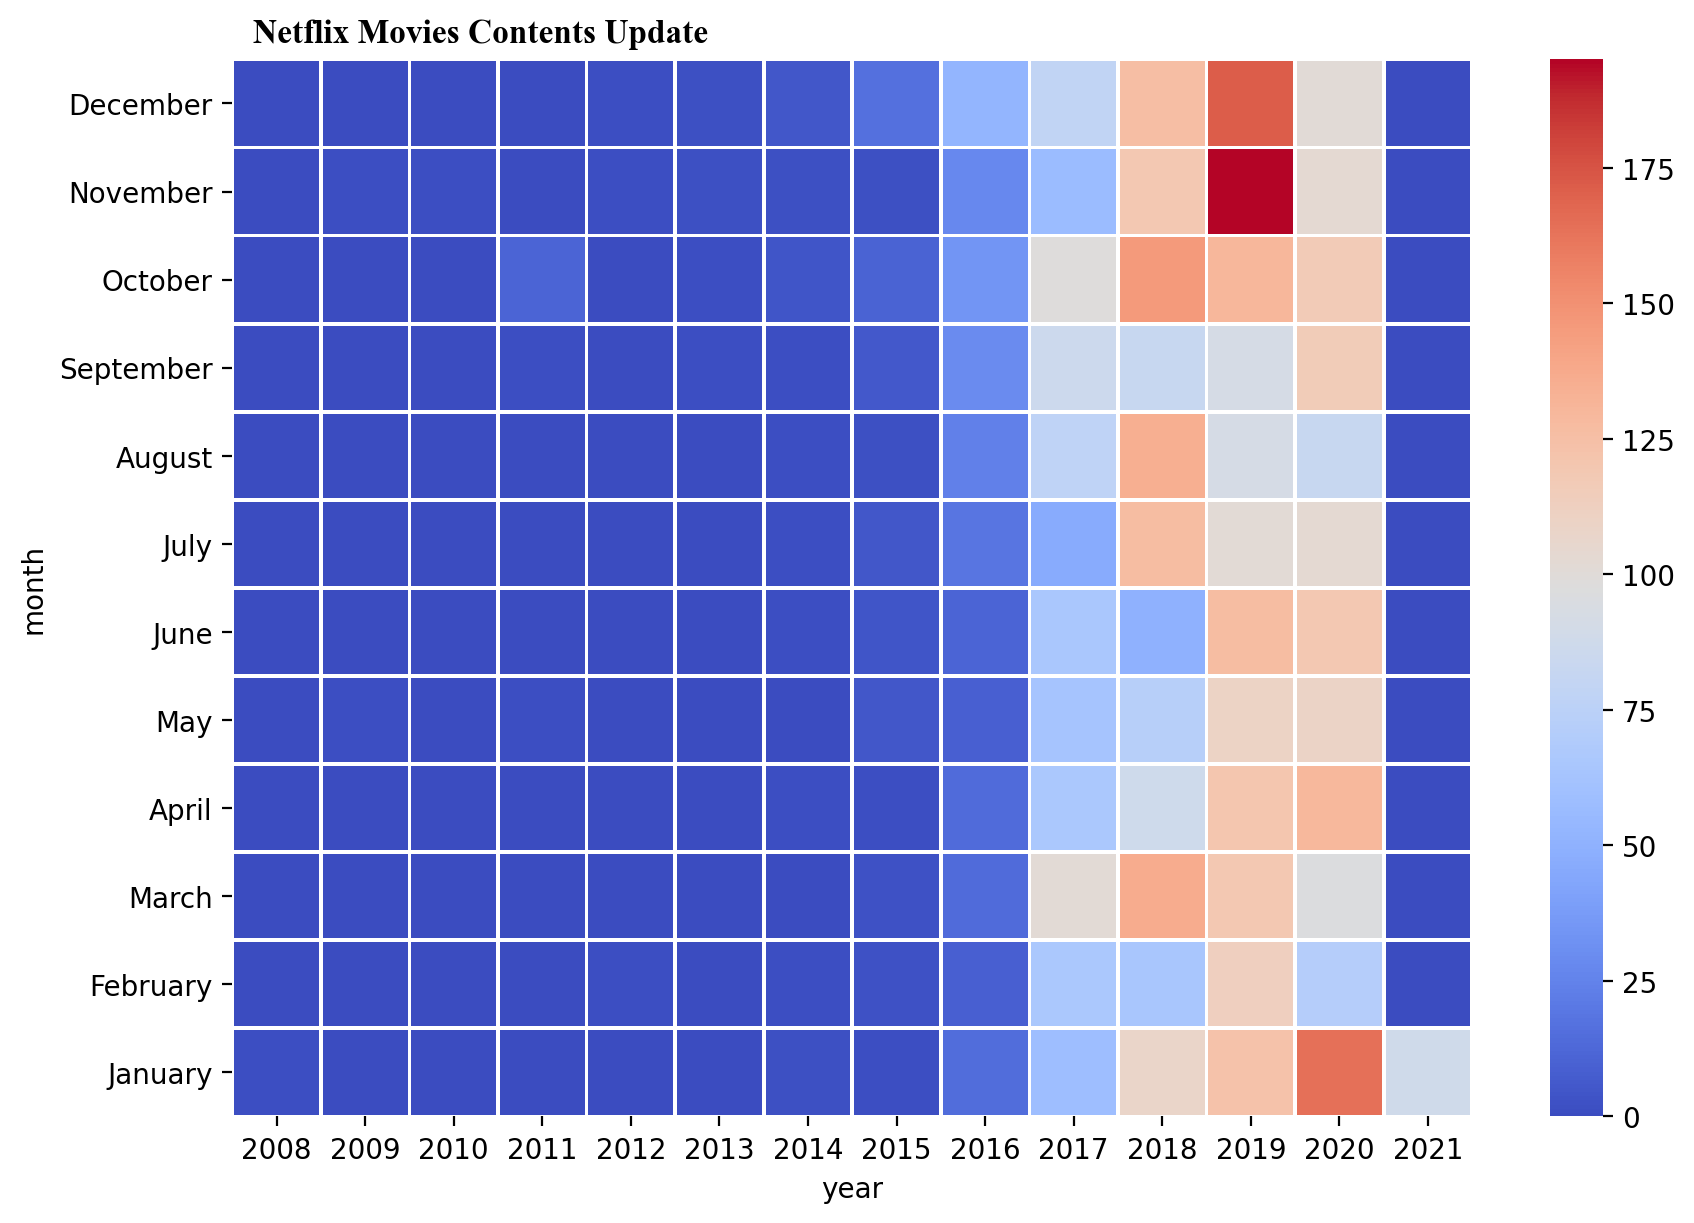

In [16]:
plt.figure(figsize=(10, 7), dpi=200)
sns.heatmap(date_movies_df, cmap='coolwarm',linewidths=1,linecolor='white')
plt.title('Netflix Movies Contents Update', fontsize=12, fontfamily='times new roman', fontweight='bold', position=(0.20, 1.0+0.02))

If we compare these two heatmap, we can see that in the year 2020 that there are still many TV Shows update than Movies update, because maybe that Movies required much budget rather than TV Shows.

In Netflix TV Shows Content Update year 2020, we can see that there are comparetively much more content was released, it is because January is before the pandemic begin and December is after several months of ongoing pandemic and people much more adapt to this pandemic. This pattern not happened in Netflix Movies Content Update.

### Rating Analysis

Text(0.5, 1.0, 'Netflix TV Shows Ratings')

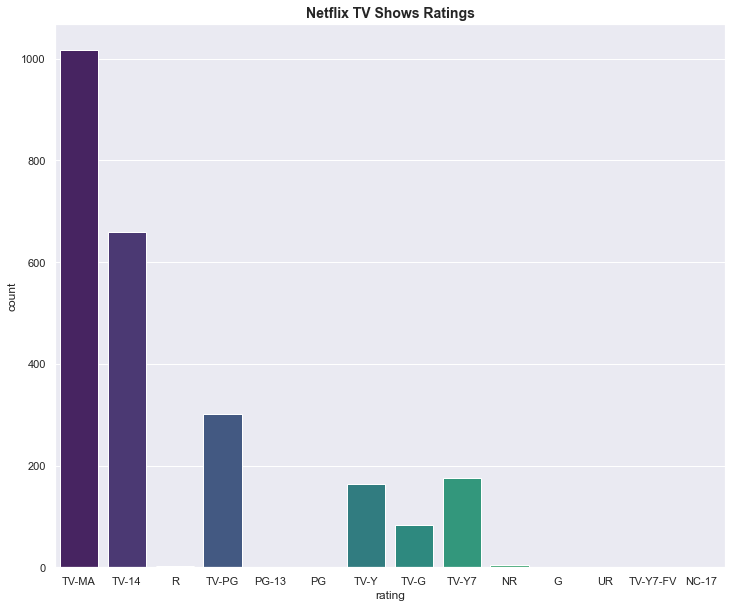

In [17]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(x='rating', data=netflix_shows, palette='viridis', order=netflix_movies['rating'].value_counts().index[0:15])
plt.title('Netflix TV Shows Ratings', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Netflix Movies Ratings')

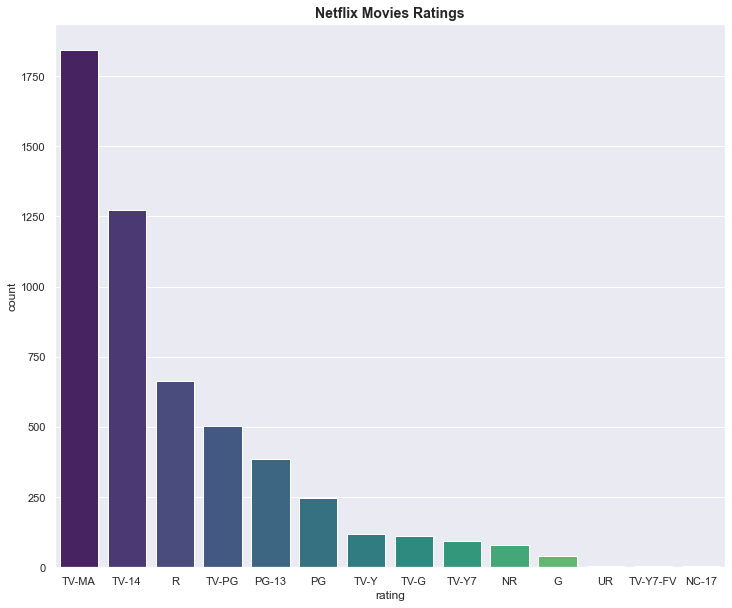

In [18]:
plt.figure(figsize=(12,10))
sns.set(style = 'darkgrid')
sns.countplot(x='rating', data=netflix_movies, palette='viridis', order=netflix_movies['rating'].value_counts().index[0:15])
plt.title('Netflix Movies Ratings', fontsize=14, fontweight='bold')

From these two countplot, the largest count of Movies and TV Shows are made with the 'TV-MA' rating. 'TV-MA' rating is a rating assigned by TV Parental Guidelines designed for mature audiences only.

Second largest count of Movies and TV Shows is the 'TV-14', a content that may be inappropriate for children younger than 14 years of age.

But for the third largest, we got different result between Movies and TV Shows. Where the third largest of Movies is 'R', a content where children under 17 years old require accompanying parent or adult guardian. And the third largest of TV Shows is 'TV-PG', a content that contain some material that parents or guardians may find inappropriate for younger children.

## Preparing Data from Netflix and IMDB dataset
### Merge the data then perform data cleansing

In [19]:
# take the data from IMDB rating.csv
imdb_ratings = pd.read_csv("IMDB movies extensive dataset/IMDb ratings.csv",usecols=['weighted_average_vote'])
imdb_ratings.head()

weighted_average_vote
0                    5.9
1                    6.1
2                    5.8
3                    5.2
4                    7.0

In [20]:
# take the data from IMDB movies.csv
imdb_titles = pd.read_csv("IMDB movies extensive dataset/IMDb movies.csv", usecols=['title','year','genre'])
imdb_titles.head()

C:\Users\Ibnu Habibi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


title  year                      genre
0                   Miss Jerry  1894                    Romance
1  The Story of the Kelly Gang  1906    Biography, Crime, Drama
2               Den sorte drøm  1911                      Drama
3                    Cleopatra  1912             Drama, History
4                    L'Inferno  1911  Adventure, Drama, Fantasy

In [21]:
# create a new data frame from IMDB rating.csv and IMDB movies.csv
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'IMDB Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})

In [22]:
ratings.drop_duplicates(subset=['Title','Release Year','IMDB Rating'], inplace=True)
ratings.shape

(85852, 4)

First we create a data frame from imdb_ratings dataset and imdb_titles dataset to get a dataset that contains information about title, release year, rating, and genre information of a film that on IMDB list. Then, we performing an inner joint to get information from content that has ratings on IMDB and are available on Netflix. 

In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85852 entries, 0 to 85854
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         85852 non-null  object 
 1   Release Year  85852 non-null  object 
 2   IMDB Rating   85852 non-null  float64
 3   Genre         85852 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.3+ MB


In [24]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [25]:
# joint netflix dataset and imdb dataset
ratings.dropna()
joint_netflix_imdb = ratings.merge(netflix_df,left_on='Title',right_on='title',how='inner')
joint_netflix_imdb = joint_netflix_imdb.sort_values(by='IMDB Rating', ascending=False)
joint_netflix_imdb.head(10)

Title Release Year  IMDB Rating  \
991                        Innocent         2017          9.0   
1002                       Breakout         2019          9.0   
398                    Pulp Fiction         1994          8.9   
380                Schindler's List         1993          8.9   
1301                      Inception         2010          8.8   
1669         Much Ado About Nothing         2011          8.6   
227                        Gol Maal         1979          8.6   
736                     City of God         2002          8.6   
2669  Ani... Dr. Kashinath Ghanekar         2018          8.6   
609                         Koshish         1972          8.6   

                          Genre show_id     type  \
991                      Comedy   s3009  TV Show   
1002   Adventure, Comedy, Drama   s1093  TV Show   
398                Crime, Drama   s5003    Movie   
380   Biography, Drama, History   s5431    Movie   
1301  Action, Adventure, Sci-Fi   s2980    Movie   
1669            Comedy, Romance   s4266    Movie   
227             Comedy, Romance   s2464    Movie   
736                Crime, Drama   s1401    Movie   
2669                      Drama    s527    Movie   
609                       Drama   s3443    Movie   

                              title                        director  \
991                        Innocent                      Seren Yüce   
1002                       Breakout                             NaN   
398                    Pulp Fiction               Quentin Tarantino   
380                Schindler's List                Steven Spielberg   
1301                      Inception               Christopher Nolan   
1669         Much Ado About Nothing   Alejandro Fernández Almendras   
227                        Gol Maal            Hrishikesh Mukherjee   
736                     City of God  Fernando Meirelles, Katia Lund   
2669  Ani... Dr. Kashinath Ghanekar              Abhijeet Deshpande   
609                         Koshish                          Gulzar   

                                                   cast  \
991   Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...   
1002  Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...   
398   John Travolta, Samuel L. Jackson, Uma Thurman,...   
380   Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...   
1301  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...   
1669  Agustín Silva, Paulina García, Daniel Alcaíno,...   
227   Amol Palekar, Bindiya Goswami, Deven Verma, Ut...   
736   Alexandre Rodrigues, Leandro Firmino, Phellipe...   
2669  Subodh Bhave, Vaidehi Parshurami, Nandita Patk...   
609   Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...   

                            country          date_added  release_year rating  \
991                          Turkey    January 23, 2019          2017  TV-MA   
1002                            NaN        July 1, 2017          2010  TV-14   
398                   United States     January 1, 2019          1994      R   
380                   United States       April 1, 2018          1993      R   
1301  United States, United Kingdom     January 1, 2020          2010  PG-13   
1669   Chile, United States, France     October 1, 2016          2016  TV-MA   
227                           India   December 31, 2019          1979  TV-PG   
736         Brazil, France, Germany     January 1, 2020          2002      R   
2669                          India  September 10, 2020          2018  TV-14   
609                           India   December 31, 2019          1972  TV-14   

      duration                                          listed_in  \
991   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
1002  1 Season                  International TV Shows, TV Dramas   
398    154 min                Classic Movies, Cult Movies, Dramas   
380    195 min                             Classic Movies, Dramas   
1301   148 min    Action & Adventure, Sci-Fi & Fantasy, Thrillers   
1669    96 min

In [26]:
joint_netflix_imdb.columns

Index(['Title', 'Release Year', 'IMDB Rating', 'Genre', 'show_id', 'type',
       'title', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [27]:
## we drop the duplicate columns 
step1 = joint_netflix_imdb.drop(['title', 'Release Year'],axis = 1)
step1.columns

Index(['Title', 'IMDB Rating', 'Genre', 'show_id', 'type', 'director', 'cast',
       'country', 'date_added', 'release_year', 'rating', 'duration',
       'listed_in', 'description'],
      dtype='object')

In [28]:
## change all of the columns name to lowercase and IMDB Rating to imdb_rating
## and rating of netflix to tv_rating
step2 = step1.rename(columns = {'Title':'title', 'IMDB Rating':'imdb_rating', 
                                'Genre':'genre', 'rating':'tv_rating'})
step2.columns

Index(['title', 'imdb_rating', 'genre', 'show_id', 'type', 'director', 'cast',
       'country', 'date_added', 'release_year', 'tv_rating', 'duration',
       'listed_in', 'description'],
      dtype='object')

In [29]:
## store step 2 to netflix_imdb_df
netflix_imdb_df = step2

### Analysis of Content on Netflix

#### Top rated content on Netflix

In [30]:
import plotly.express as px
top_rated=netflix_imdb_df[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='imdb_rating',
    color='imdb_rating',
    title='Top Rated Content and Country Origin')
fig.show()

Top rated content with country origin. We can see Breakout does not have country information because on our dataset (netflix_df) 
it does not have information about the country (NaN).

#### Countries with highest rated content.

In [31]:
country_high_rate = netflix_imdb_df['country'].value_counts().sort_values(ascending=False)
country_high_rate = pd.DataFrame(country_high_rate)
top_countries = country_high_rate[0:11]
top_countries

country
United States                      799
India                              701
United Kingdom                     107
Canada                              56
Philippines                         50
Spain                               40
South Korea                         36
Indonesia                           35
France                              33
United Kingdom, United States       31
Australia                           30

In [32]:
import plotly.express as px
data = dict(
    number=[799,701,107,56,50,40,36,35,33,30],
    country=['United States', 'India', 'United Kingdom', 'Canada', 'Philippines', 'Spain', 'South Korea', 'Indonesia','France','Australia'])
fig = px.funnel(data, x='number', y='country', title='Countries with Highest Rated Content')
fig.show()

#### Year Wise Analysis

Text(0.5, 1.0, 'Year Wise Analysis')

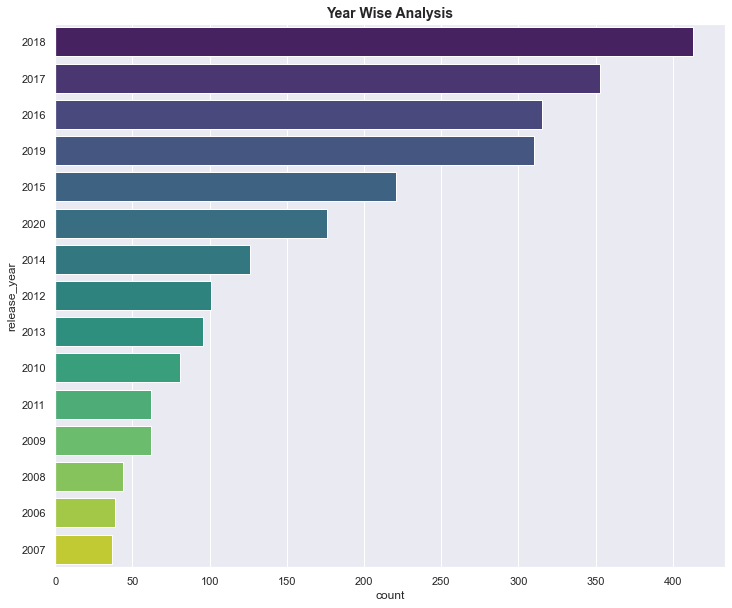

In [33]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(y='release_year', data=netflix_imdb_df, palette='viridis', 
              order=joint_netflix_imdb['release_year'].value_counts().index[0:15])
plt.title('Year Wise Analysis', fontsize=14, fontweight='bold')

From Year Wise Analysis Countplot, we can see that 2018 was the year when most of the content (Movies and TV Shows) were released.

#### Top 10 Content Creating Countries

In [34]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

<ipython-input-34-05759bc2aa29>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

Text(0.5, 1.0, 'Top 10 Content Creating Countries')

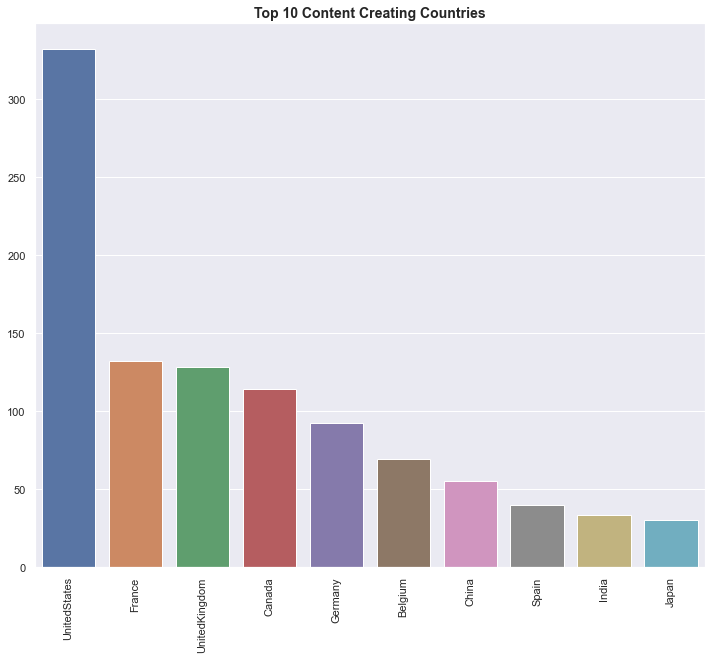

In [36]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)
plt.title('Top 10 Content Creating Countries', fontsize=14, fontweight='bold')

#### Duration of Movies

In [37]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'] = netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

<ipython-input-37-f30062ca07b3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-f30062ca07b3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

Text(0.5, 1.0, 'Netflix Movies KDE Plot')

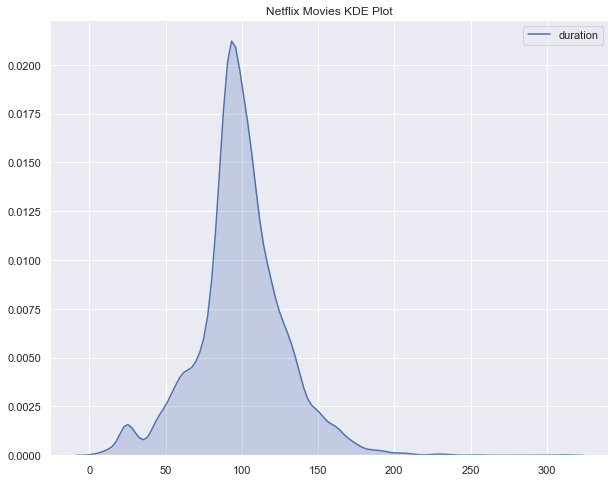

In [38]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.title('Netflix Movies KDE Plot')

From KDE plot above, we can see that a good amount of movies duration on Netflix are between 75 - 120 mins.

#### Word Cloud for Movies Genres

In [39]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

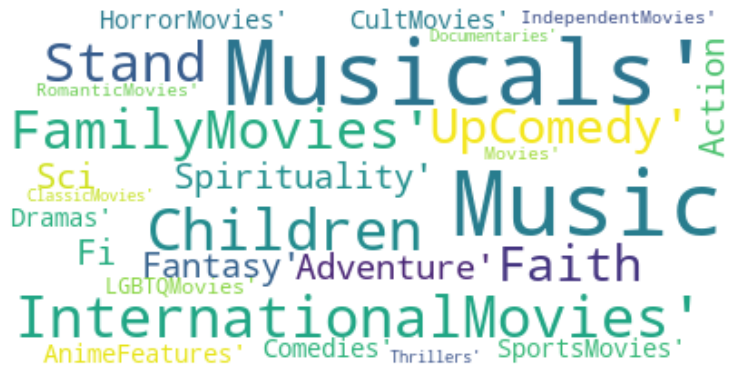

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#### Lollipop Plot of Genres vs Count on Netflix

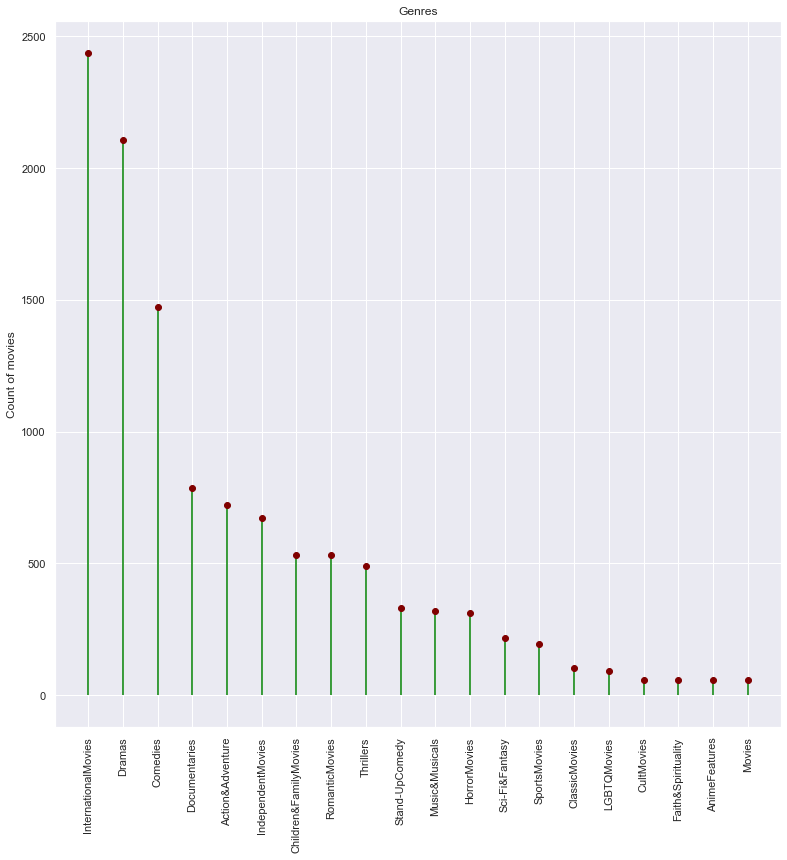

<Figure size 720x720 with 0 Axes>

In [41]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
ax.set_title("Genres");

From the Lollipop Plot above, we can see that the top three genres that have the highest amount of content on Netflix is International Movies, Dramas, and Comedies.

### Analysis of TV Series on Netflix

In [42]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

<ipython-input-42-af70cc212816>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

#### Most TV Shows Creating Countries

Text(0.5, 1.0, 'Content Creating Countries')

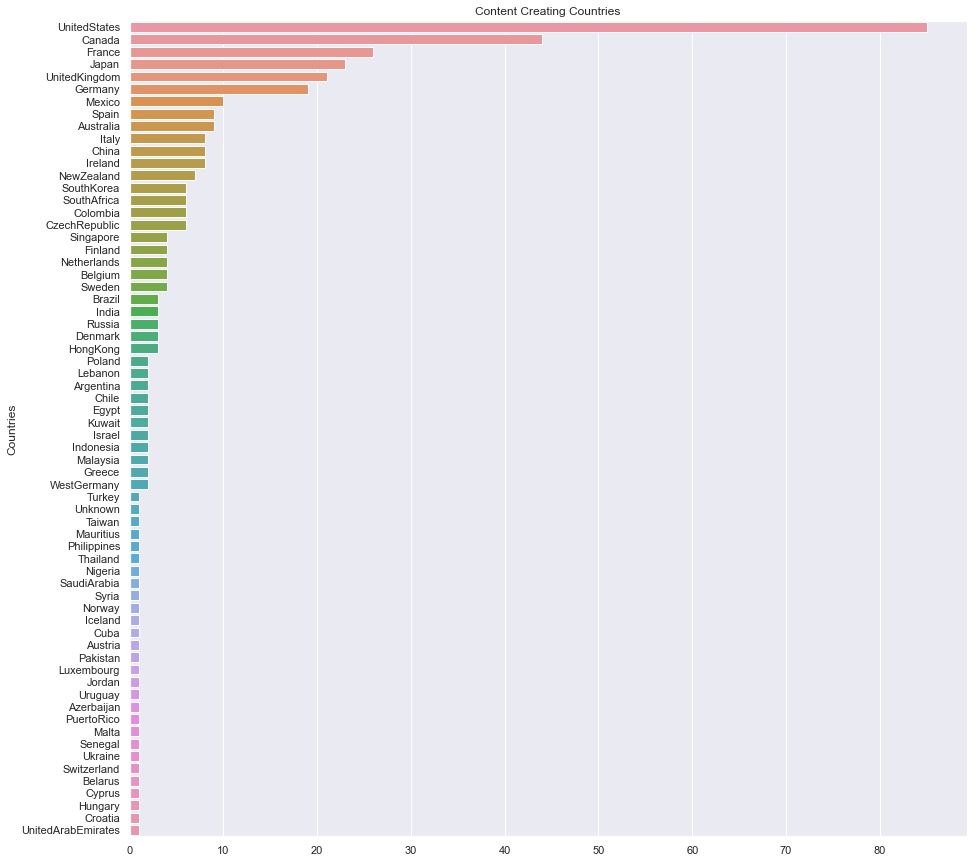

In [44]:
plt.figure(figsize=(15,15))
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))
plt.ylabel('Countries')
plt.title('Content Creating Countries')

From the plot above, we can see that United States has the most TV Shows that is created on Netflix.

### TV Shows With Most Seasons

In [45]:
features = ['title', 'duration']
durations = netflix_shows[features]

durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s','')

<ipython-input-45-e575238eaea4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-e575238eaea4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

<ipython-input-46-ad93769c4198>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
durations['no_of_seasons']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: no_of_seasons, Length: 2410, dtype: int32

In [48]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)

In [49]:
top[0:20]

title  no_of_seasons
2538                      Grey's Anatomy             16
4438                                NCIS             15
5912                        Supernatural             15
1471              COMEDIANS of the world             13
5137                        Red vs. Blue             13
1537                      Criminal Minds             12
7169                   Trailer Park Boys             12
2678                           Heartland             11
1300                              Cheers             11
2263                             Frasier             11
3592  LEGO Ninjago: Masters of Spinjitzu             10
5538                    Shameless (U.S.)             10
1577                          Dad's Army             10
5795                       Stargate SG-1             10
2288                             Friends             10
1597    Danger Mouse: Classic Collection             10
6983                    The Walking Dead              9
6718                   The Office (U.S.)              9
1431            Club Friday The Series 6              9
2237                      Forensic Files              9

[Text(0, 0, "Grey's Anatomy"),
 Text(0, 0, 'NCIS'),
 Text(0, 0, 'Supernatural'),
 Text(0, 0, 'COMEDIANS of the world'),
 Text(0, 0, 'Red vs. Blue'),
 Text(0, 0, 'Criminal Minds'),
 Text(0, 0, 'Trailer Park Boys'),
 Text(0, 0, 'Heartland'),
 Text(0, 0, 'Cheers'),
 Text(0, 0, 'Frasier'),
 Text(0, 0, 'LEGO Ninjago: Masters of Spinjitzu'),
 Text(0, 0, 'Shameless (U.S.)'),
 Text(0, 0, "Dad's Army"),
 Text(0, 0, 'Stargate SG-1'),
 Text(0, 0, 'Friends'),
 Text(0, 0, 'Danger Mouse: Classic Collection'),
 Text(0, 0, 'The Walking Dead'),
 Text(0, 0, 'The Office (U.S.)'),
 Text(0, 0, 'Club Friday The Series 6'),
 Text(0, 0, 'Forensic Files')]

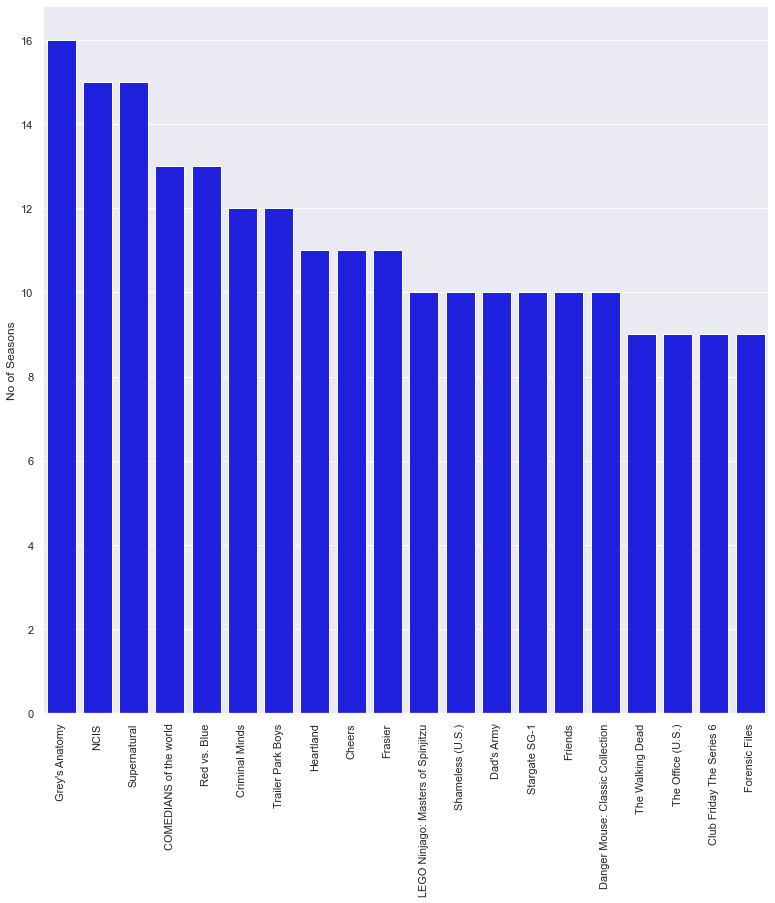

In [50]:
top20 = top[0:20]
g = sns.barplot(x='title', y='no_of_seasons', data=top20, color='blue')
g.set(xlabel='',ylabel='No of Seasons')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

We've got Grey's Anatomy for TV Shows with the most seasons with 16 seasons, also there are 2 others TV Shows that at least has 15 seasons, NCIS and Supernatural.

### TV Shows Seasons Analysis

In [51]:
# calculate the values of each seasons
nos = (top['no_of_seasons']).value_counts()

In [52]:
pd.DataFrame(nos)

no_of_seasons
1            1608
2             382
3             184
4              87
5              58
6              30
7              19
8              18
9               8
10              6
11              3
15              2
13              2
12              2
16              1

In [53]:
import plotly.express as px
nos1 = dict(
    Count=nos.tolist(),
    Season=['1','2','3','4','5','6','7','8','9','10','11','15','13','12','16'])
fig = px.pie(nos1, values='Count', names='Season',title='No of Seasons')
fig.show()

From Pie Chart above, we can see that 66.7% of the TV Shows on Netflix only has 1 season. And we can say that majority of the TV Shows on Netflix has 1 to 3 seasons.

#### Word Cloud for TV Shows Genre

In [54]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

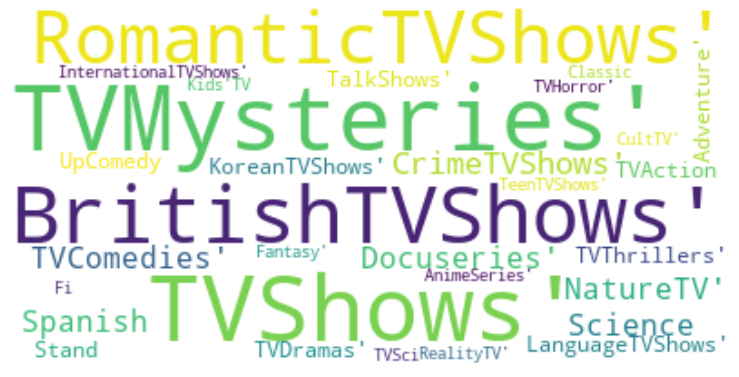

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### TV Shows in United States

In [56]:
us_series_data = netflix_shows[netflix_shows['country']=='United States']
oldest_us_series = us_series_data.sort_values(by='release_year')[0:20]
newest_us_series = us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [57]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
                header=dict(values=['Title', 'Release Year'], fill_color='royalblue', font=dict(color='white', size=12)),
                cells=dict(values=[oldest_us_series['title'], oldest_us_series['release_year']]))])
fig.show()

Table above show the oldest US TV Shows on Netflix.

In [58]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
                header=dict(values=['Title', 'Release Year'], fill_color='royalblue', font=dict(color='white', size=12)),
                cells=dict(values=[newest_us_series['title'], newest_us_series['release_year']]))])
fig.show()

Table above show the latest US TV Shows on Netflix.

### Content in Indonesia

In [59]:
netflix_id=netflix_df[netflix_df['country']=='Indonesia']
nannef=netflix_id.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

From the figure above, we can see that content in Indonesia is divided by popular director and not so popular director. Riri Riza and Rocky Soraya is the most popular director which each has 5 films on their name. The majority of Indonesia director has 1 content on their name.

In [60]:
latest_id_content = netflix_id.sort_values(by='release_year', ascending=False)[0:20]
latest_id_content 

show_id     type                                        title  \
7591   s7592    Movie                                      Whipped   
5987   s5988    Movie                                Tarung Sarung   
3764   s3765    Movie                   Love Like the Falling Rain   
4098   s4099    Movie                                        Milea   
32       s33    Movie                          #FriendButMarried 2   
4640   s4641    Movie               One Day We'll Talk About Today   
5594   s5595    Movie                          Si Doel the Movie 3   
1297   s1298  TV Show  Check The Store Next Door: The Next Chapter   
1520   s1521    Movie                       Crazy Awesome Teachers   
57       s58    Movie                                   100% Halal   
6444   s6445    Movie                          The Heartbreak Club   
1099   s1100    Movie                                   Bridezilla   
1931   s1932    Movie                  Eggnoid: Love & Time Portal   
7147   s7148    Movie                       Too Handsome to Handle   
7047   s7048    Movie                        This Earth of Mankind   
4359   s4360    Movie                             My Stupid Boss 2   
3755   s3756    Movie                              Love for Sale 2   
1763   s1764    Movie                                   Dilan 1991   
5593   s5594    Movie                          Si Doel the Movie 2   
6054   s6055    Movie                                The 3rd Eye 2   

                            director  \
7591                    Chandra Liow   
5987                 Archie Hekagery   
3764            Lasja Fauzia Susatyo   
4098        Fajar Bustomi, Pidi Baiq   
32                     Rako Prijanto   
4640           Angga Dwimas Sasongko   
5594                      Rano Karno   
1297                             NaN   
1520       Sammaria Sari Simanjuntak   
57                     Jastis Arimba   
6444  Charles Gozali, Bagus Bramanti   
1099              Andibachtiar Yusuf   
1931                   Naya Anindita   
7147       Sabrina Rochelle Kalangie   
7047                Hanung Bramantyo   
4359                     Upi Avianto   
3755              Andibachtiar Yusuf   
1763        Fajar Bustomi, Pidi Baiq   
5593                      Rano Karno   
6054                    Rocky Soraya   

                                                   cast    country  \
7591  Andovi da Lopez, Jovial da Lopez, Chandra Liow...  Indonesia   
5987  Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...  Indonesia   
3764  Jefri Nichol, Aurora Ribero, Axel Matthew, Nad...  Indonesia   
4098  Iqbaal Ramadhan, Vanesha Prescilla, Ira Wibowo...  Indonesia   
32    Adipati Dolken, Mawar de Jongh, Sari Nila, Von...  Indonesia   
4640  Rachel Amanda, Rio Dewanto, Shelia Dara, Donny...  Indonesia   
5594  Rano Karno, Cornelia Agatha, Maudy Koesnaedi, ...  Indonesia   
1297  Ernest Prakasa, Chew Kin Wah, Dion Wiyoko, Mor...  Indonesia   
1520  Gading Marten, Dian Sastrowardoyo, Faradina Mu...  Indonesia   
57    Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...  Indonesia   
6444  Bhisma Mulia, Denira Wiraguna, Didi Kempot, Si...  Indonesia   
1099  Jessica Mila, Rio Dewanto, Sheila Dara, Rafael...  Indonesia   
1931  Morgan Oey, Sheila Dara, Luna Maya, Kevin Juli...  Indonesia   
7147  Ari Irham, Nikita Willy, Calvin Jeremy, Rachel...  Indonesia   
7047  Iqbaal Ramadhan, Mawar de Jongh, Sha Ine Febri...  Indonesia   
4359  Reza Rahadian, Bunga Citra Lestari, Chew Kin W...  Indonesia   
3755  Della Dartyan, Adipati Dolken, Ratna Riantiarn...  Indonesia   
1763  Iqbaal Ramadhan, Vanesha Prescilla, Ira Wibowo...  Indonesia   
5593  Maudy Koesnaedi, Rano Karno, Cornelia Agatha, ...  Indonesia   
6054  Jessica Mila, Bianca Hello, Nabilah Ayu, Sophi...  Indonesia   

              date_added  release_year rating   duration  \
7591  September 18, 2020          2020  TV-14     98 min   
5987   December 31, 2020          2020  TV-PG    116 min   
3764    October 15, 2020          2020  TV

In [61]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Title', 'Release Year'], fill_color='royalblue', font=dict(color='white', size=12)),
                cells=dict(values=[latest_id_content['title'], latest_id_content['release_year']]))])
fig.show()

## Recomendation System

On this recomendation system, we use TF-IDF. The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#replace Nan with an empty string
netflix_df['description'] = netflix_df['description'].fillna('')

#construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

#output the shape of matrix
tfidf_matrix.shape

(7787, 17905)

There are about 17095 words described for the 7787 movies in this dataset.
We will ise cosine similarity score because it is independent of magnitude and is relatively easy and fast to calculate

In [64]:
#import linear kernel
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [65]:
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

In [66]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    
    #get the pairwise similarity scores off all movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #get the movies indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 most similar movies
    return netflix_df['title'].iloc[movie_indices]

The recommendation is just based on the Plot(description).

In [67]:
get_recommendations('Pulp Fiction')

5078                         Raja Natwarlal
5651                              Skiptrace
7459                 Waiting for "Superman"
5739                               Sparring
2476                            Good Burger
5942                         Swiss Army Man
3579    Lego DC Comics: Batman Be-Leaguered
4564                       Ocean's Thirteen
5246                               Rocky II
5765                               Splatter
Name: title, dtype: object

In [68]:
get_recommendations('Innocent')

6174               The Break
2744              Hinterland
5604                Silencer
6390         The Ghost Bride
6908            THE STRANGER
6958    The Umbrella Academy
6876              The Sinner
2776              Holly Star
941           Bitter Daisies
2046         Everybody Knows
Name: title, dtype: object

Our model is performs well, but not very accurate. Therefore, to improve our recommendation performance, we need to add new metrics to the model. 

### Content Based Filtering on Multiple Metrics

We will use this following factors:
    <ul>
        <li>Title</li>
        <li>Cast</li>
        <li>Director</li>
        <li>Listed in</li>
        <li>Plot</li>
    </ul>

In [69]:
fillna = netflix_df.fillna('')
fillna.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

#### Cleaning data
Making all the words lower case

In [70]:
def clean_data(x):
    return str.lower(x.replace(" ", ""))

Identifying factors for filtering the model

In [71]:
factors = ['title', 'director', 'cast', 'listed_in', 'description']
fillna = fillna[factors]

In [72]:
for factor in factors:
    fillna[factor] = fillna[factor].apply(clean_data)
fillna.head()

title         director                                               cast  \
0     3%                   joãomiguel,biancacomparato,michelgomes,rodolfo...   
1   7:19  jorgemichelgrau  demiánbichir,héctorbonilla,oscarserrano,azalia...   
2  23:59      gilbertchan  teddchan,stellachung,henleyhii,lawrencekoh,tom...   
3      9       shaneacker  elijahwood,johnc.reilly,jenniferconnelly,chris...   
4     21    robertluketic  jimsturgess,kevinspacey,katebosworth,aaronyoo,...   

                                           listed_in  \
0     internationaltvshows,tvdramas,tvsci-fi&fantasy   
1                         dramas,internationalmovies   
2                   horrormovies,internationalmovies   
3  action&adventure,independentmovies,sci-fi&fantasy   
4                                             dramas   

                                         description  
0  inafuturewheretheeliteinhabitanislandparadisef...  
1  afteradevastatingearthquakehitsmexicocity,trap...  
2  whenanarmyrecruitisfounddead,hisfellowsoldiers...  
3  inapostapocalypticworld,rag-dollrobotshideinfe...  
4  abrilliantgroupofstudentsbecomecard-countingex...

Creating a bag of words for all rows

In [73]:
def create_soup(x):
    return x['title']+ ' '+ x['director'] + ' ' + x['cast'] + ' ' + x['listed_in'] + ' ' + x['description']

In [74]:
fillna['soup'] = fillna.apply(create_soup, axis=1)

### Use Count Vectorizer for Recommendation System

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fillna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [76]:
fillna = fillna.reset_index()
indices = pd.Series(fillna.index, index=fillna['title'])

In [77]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    #get the pairwise similarity scores off all movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #get the movies indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 most similar movies
    return netflix_df['title'].iloc[movie_indices]

In [78]:
get_recommendations_new('PK', cosine_sim2)

100                            3 Idiots
6585       The Legend of Michael Mishra
552                   Anthony Kaun Hai?
2571                             Haapus
5377                              Sanju
5954                   Taare Zameen Par
1261                    Chal Dhar Pakad
1271                    Chance Pe Dance
1831                            Dostana
1988    EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [79]:
get_recommendations_new('Pulp Fiction', cosine_sim2)

6435    The Hateful Eight: Extended Version
6434                      The Hateful Eight
7                                       187
3103                           Jackie Brown
1787                       Django Unchained
5981                            Tango Feroz
165                      A Clockwork Orange
392         Alice Doesn't Live Here Anymore
1438                           Coach Carter
4008                           Mean Streets
Name: title, dtype: object

In [80]:
get_recommendations_new('City of God', cosine_sim2)

150          A Billion Colour Story
6877           The Skin of the Wolf
3918                          Manto
4857                           Pihu
5261                           ROMA
4762                  Paradise Lost
542                 Another Forever
1401    City of God: 10 Years Later
3043                      Invisible
3225                            Joy
Name: title, dtype: object

## Netflix Content from Books?

In [81]:
books_df = pd.read_csv("goodbooks-10k/books.csv")
books_df.head()

id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   
3                     To Kill a Mockingbird  ...       3198671   
4                          The Great Gatsby  ...       2683664   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   
2            3916824                    95009     456191     436802   
3            3340896                    72586      60427     117415   
4            2773745                    51992      86236     197621   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   
2     793319     875073    1355439   
3     446835    1001952    1714267   
4     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...  

[5 rows x 23 columns]

In [82]:
books_df['original_title'] = books_df['original_title'].str.lower()
netflix_df['title'] = netflix_df['title'].str.lower()
netflix_books = netflix_df.merge(books_df, left_on='title', right_on='original_title', how='inner')
netflix_books.shape

(289, 35)

In [83]:
import plotly.graph_objects as go

labels = ['Shows From Books','Shows Not From Books']
values = [289,7787]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)], 
                layout=go.Layout(title=go.layout.Title(text="Netflix Content From Books")))
fig.show()